<a href="https://colab.research.google.com/github/rranjithkumar100/AI-Training/blob/main/Day_28_KNN_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAGIC Gamma Telescope Dataset - KNN Classification**
---

<span style="color:blue;">The MAGIC Gamma Telescope dataset contains features extracted from gamma-ray signals to distinguish between gamma and hadron events. It is commonly used for binary classification tasks in machine learning research.</span>  

### **Target Value**  
- **class:** `g`, `h`  
  - **g** = gamma (signal): 12,332 instances  
  - **h** = hadron (background): 6,688 instances  

https://www.kaggle.com/datasets/abhinand05/magic-gamma-telescope-dataset

---



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Day_28_telescope_data.csv to Day_28_telescope_data.csv


In [ ]:
df = pd.read_csv('Day_28_telescope_data.csv')

In [ ]:
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df.tail()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


# The data is not distributed randomly, it is distributed in the following way:

*   From 0 to 12332 is gamma (signal) data

*   12332 to 19020 is hadron (background) data

In [ ]:
df.iloc[12227:12332]

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12227,12227,23.0065,18.8357,2.5527,0.3557,0.1891,4.4306,17.9610,10.6529,25.3810,123.864,g
12228,12228,31.1542,18.4944,2.8845,0.3014,0.1520,5.1649,29.3314,11.7729,40.2400,165.646,g
12229,12229,50.3748,18.2968,2.9633,0.2905,0.1572,23.7008,51.0189,-4.4907,0.9822,257.778,g
12230,12230,24.3849,14.4254,2.5270,0.4666,0.2541,17.1967,7.1992,10.2321,14.7690,157.267,g
12231,12231,113.4950,22.2247,3.0542,0.2304,0.1399,-7.2961,-42.9525,-15.1290,2.7290,354.769,g
...,...,...,...,...,...,...,...,...,...,...,...,...
12327,12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.037,g
12328,12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.498,g
12329,12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.281,g
12330,12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.209,g


In [ ]:
df.iloc[12333:12338]

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12333,12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,h
12334,12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,h
12335,12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,h
12336,12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,h
12337,12337,215.3230,67.8238,3.4396,0.1363,0.0725,298.6140,-95.0773,-57.2209,76.9240,243.0640,h


In [ ]:
df1 = df.copy()

In [ ]:
df1.isnull().sum()

,0
Unnamed: 0,0
fLength,0
fWidth,0
fSize,0
fConc,0
fConc1,0
fAsym,0
fM3Long,0
fM3Trans,0
fAlpha,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# Target value ('class') is object, use label encoder to convert into number
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['class'] = le.fit_transform(df1['class'])


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.7 MB


In [ ]:
df1

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [ ]:
x = df1.iloc[:, :-1]  # All columns except the last
y = df1.iloc[:, -1]   # Only the last column

In [50]:
x

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...,...
19015,19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [51]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
19015,1
19016,1
19017,1
19018,1


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=3)


In [53]:
#binary classification target value should split equally, but in our data, gamma rays (0) dominating more than hadron (1)
unique, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique, counts))
print(label_counts)  # Example Output: {0: 12332, 1: 6688}

{0: 8600, 1: 4714}


In [54]:
# balance the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [59]:
# again test the target values
unique, counts = np.unique(y_train_balanced, return_counts=True)
label_counts = dict(zip(unique, counts))
print(label_counts)  # Now we can expect equal output: example: {0: 12332, 1: 12332}

{0: 8600, 1: 8600}


In [60]:
y_train_balanced

,class
0,0
1,0
2,0
3,0
4,1
...,...
17195,1
17196,1
17197,1
17198,1


In [61]:
# our data now split equally, but its not random. first half 0 second half 1. use shuffle
from sklearn.utils import shuffle

# Shuffle the balanced training data
x_train_balanced, y_train_balanced = shuffle(x_train_balanced, y_train_balanced, random_state=42)


In [63]:
y_train_balanced.head()

,class
16847,1
10383,0
3053,0
6505,1
3501,0


In [64]:
x_train_balanced.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
16847,16375,26.588637,17.861543,2.587032,0.506401,0.29453,13.797055,15.52817,-1.516052,67.277085,240.030391
10383,8489,46.287600,19.729400,3.003700,0.251900,0.13340,30.443900,33.07490,14.052700,13.535900,242.067000
3053,8049,22.560700,19.442300,2.703300,0.388100,0.20690,33.404100,6.71090,-10.066200,0.115900,170.835000
6505,18404,17.200800,9.794800,2.527600,0.712200,0.50300,-6.416000,13.13780,8.795700,87.492800,170.407000
3501,1834,30.432400,24.744600,3.087600,0.257500,0.13770,27.472700,27.70340,-6.634800,6.710000,57.662400


In [78]:
from sklearn.neighbors import KNeighborsClassifier


In [72]:
model1 = KNeighborsClassifier(n_neighbors=3)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = KNeighborsClassifier(n_neighbors=12)

In [73]:
model1.fit(x_train_balanced,y_train_balanced)
model2.fit(x_train_balanced,y_train_balanced)
model3.fit(x_train_balanced,y_train_balanced)

KNeighborsClassifier(n_neighbors=12)

In [74]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

In [80]:
#compare these three models using confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
#confusion matrix for 3 model prediction (model1= n_neighbors=3, model2= n_neighbors=7, model3 = n_neighbors=12)
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)


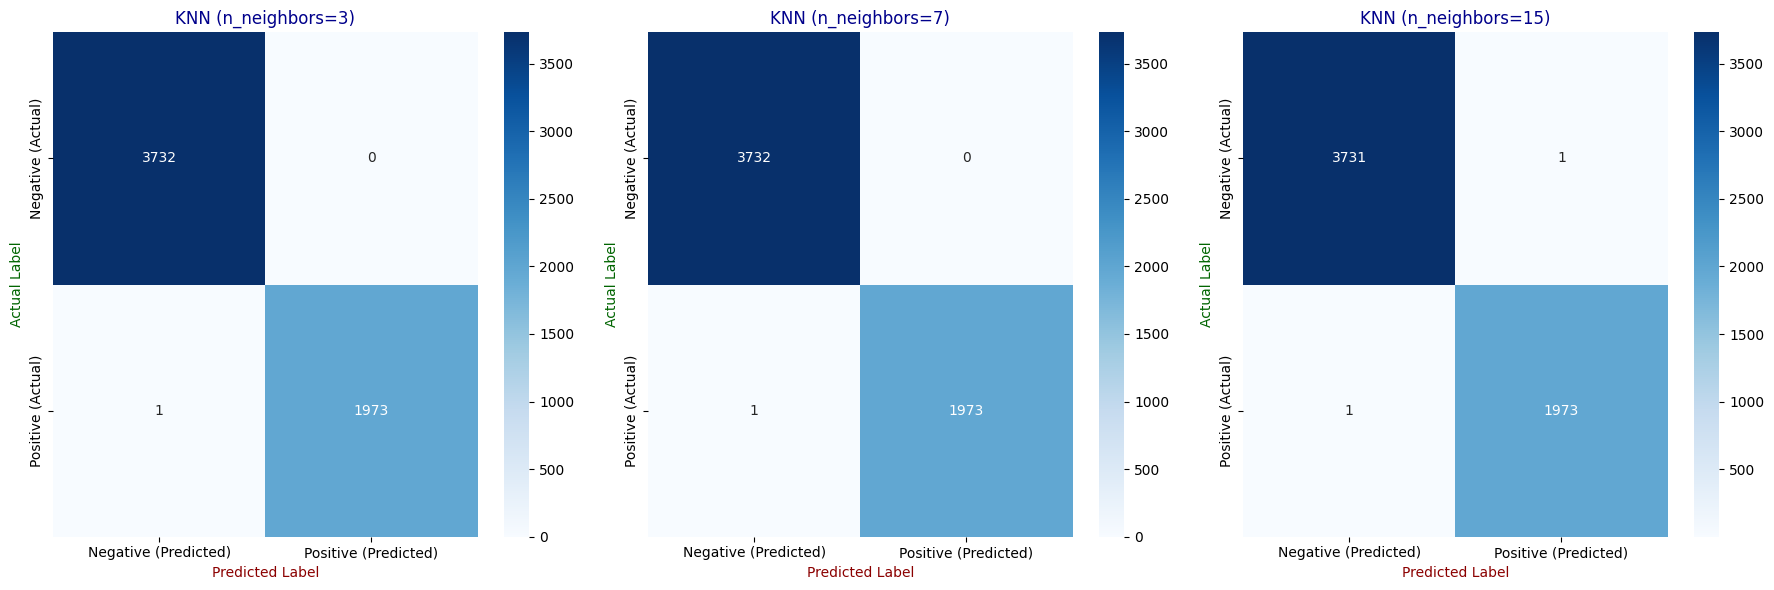

In [90]:
# Plotting all confusion matrices in a single comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define custom colors using a colormap
custom_cmap = sns.color_palette("Blues", as_cmap=True)  # Custom gradient for better distinction

# Update labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Model 1
sns.heatmap(cm1, annot=True, fmt='d', cmap=custom_cmap,
            xticklabels=['Negative (Predicted)', 'Positive (Predicted)'],
            yticklabels=['Negative (Actual)', 'Positive (Actual)'], ax=axes[0])
axes[0].set_title('KNN (n_neighbors=3)', color='darkblue')
axes[0].set_xlabel('Predicted Label', color='darkred')
axes[0].set_ylabel('Actual Label', color='darkgreen')

# Model 2
sns.heatmap(cm2, annot=True, fmt='d', cmap=custom_cmap,
            xticklabels=['Negative (Predicted)', 'Positive (Predicted)'],
            yticklabels=['Negative (Actual)', 'Positive (Actual)'], ax=axes[1])
axes[1].set_title('KNN (n_neighbors=7)', color='darkblue')
axes[1].set_xlabel('Predicted Label', color='darkred')
axes[1].set_ylabel('Actual Label', color='darkgreen')

# Model 3
sns.heatmap(cm3, annot=True, fmt='d', cmap=custom_cmap,
            xticklabels=['Negative (Predicted)', 'Positive (Predicted)'],
            yticklabels=['Negative (Actual)', 'Positive (Actual)'], ax=axes[2])
axes[2].set_title('KNN (n_neighbors=15)', color='darkblue')
axes[2].set_xlabel('Predicted Label', color='darkred')
axes[2].set_ylabel('Actual Label', color='darkgreen')

# Show the plot
plt.tight_layout()
plt.show()
